## API opendatasoft

Le portail opendatasoft permet d'accéder à différents jeux de données de Météo France: 
- un jeu de données historiques appelé SYNOP
- les prévisions du modèle AROME

https://data.opendatasoft.com

Le nom du dataset correspondant à la base SYNOP est : 
```
donnees-synop-essentielles-omm%40public
```

L'API v2 de opendatasoft s'interroge via l'adresse suivante:
```
https://data.opendatasoft.com/api/v2/opendatasoft/datasets/
```

Python via sa bibliothèque requests permet de requêter une API web en mode http. La mise en forme de l'url d'interrogation se fait gràce à la fonction urlencode de la bibliothèque urllib.parse.

La liste des champs disponibles est fournie plus bas. On va s'intéresser aux données de température en °C (champ tc) et de nébulosité en octa (nbas).

Le code suivant détaille comment la mise en forme de la requête :

In [5]:
import urllib.parse
server="https://data.opendatasoft.com/api/v2/opendatasoft/datasets/"
dataset="donnees-synop-essentielles-omm%40public"
station="07460"
start=2018
stop=2019
tz="Europe/Paris"
fields=["date","nbas","tc"]
params={
    'where':['numer_sta="{}"'.format(station),'date<{}'.format(stop),'date>={}'.format(start)],
    'sort':'date',
    'select': fields,
    'timezone': tz,
    'delimiter':';'
}
urlend=urllib.parse.urlencode(params,safe='',doseq=True)
url="{}/{}/exports/csv?{}".format(server,dataset,urlend)
print(url)

https://data.opendatasoft.com/api/v2/opendatasoft/datasets//donnees-synop-essentielles-omm%40public/exports/csv?where=numer_sta%3D%2207460%22&where=date%3C2019&where=date%3E%3D2018&sort=date&select=date&select=nbas&select=tc&timezone=Europe%2FParis&delimiter=%3B


Pour exécuter l'interrogation de manière simple, on peut utiliser la classe openData disponible via le fichier [openData.py](opendata.py) présent dans ce même répertoire

we've got 2694 lines and 3 columns
according to the presumed time stamp, we should have 2920 points
missing datas : 556


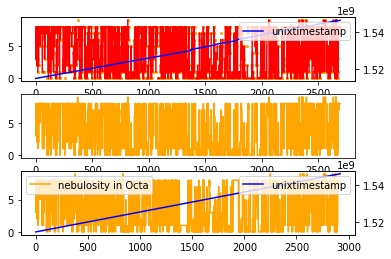

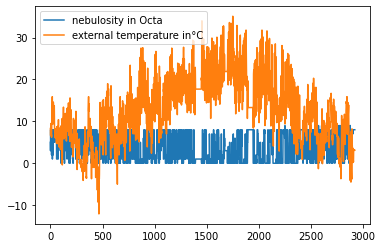

In [1]:
import matplotlib.pyplot as plt
from openData import openData

dataset='donnees-synop-essentielles-omm%40public'
# clermont-ferrand station
station="07460"
start=2018
stop=2019
tz="Europe/Paris"
fields=["date","nbas","tc"]
# we fix here the presumed timestep in hour
# for data coming from météo france, timestep is usually 3 hours
step_in_h=3
source=openData(dataset,station,start,stop,fields,tz,step_in_h)
view={'vis':True,'lib':["nebulosity in Octa","external temperature in°C"]}
source.retrieve(view=view)

### Jeu de données SYNOP : liste des champs disponibles 

champ | description de la donnée
--|--
numer_sta | ID OMM station
date | date
pmer | Pression au niveau mer
tend | Variation de pression en 3 heures(Pa)
cod_tend | Type de tendance barométrique
dd | Direction du vent moyen 10 mn (°)
ff | Vitesse du vent moyen 10 mn (m/s)
t | Température(K)
td | Point de rosée(K)
u | Humidité(%)
vv | Visibilité horizontale(m)
ww | Temps présent
w1 | Temps passé 1
w2 | Temps passé 2
n | Nebulosité totale(%)
nbas | Nébulosité  des nuages de l' étage inférieur(octa)
hbas | Hauteur de la base des nuages de l'étage inférieur(mètre)
cl | Type des nuages de l'étage inférieur
cm | Type des nuages de l'étage moyen
ch | Type des nuages de l'étage supérieur
pres | Pression station(Pa)
niv_bar | Niveau barométrique(Pa)
geop | Géopotentiel(m2/s2)
tend24 | Variation de pression en 24 heures(Pa)
tn12 | Température minimale sur 12 heures(K)
tn24 | Température minimale sur 24 heures(K)
tx12 | Température maximale sur 12 heures(K)
tx24 | Température maximale sur 24 heures(K)
tminsol | Température minimale du sol sur 12 heures(K)
sw | Méthode de mesure Température du thermomètre mouillé
tw | Température du thermomètre mouillé(K)
raf10 | Rafale sur les 10 dernières minutes(m/s)
rafper | Rafales sur une période(m/s)
per | Periode de mesure de la rafale(min)
etat_sol | Etat du sol
ht_neige | Hauteur totale de la couche de neige, glace, autre au sol(m)
ssfrai | Hauteur de la neige fraîche(m)
perssfrai | Periode de mesure de la neige fraiche(1/10 heure)
rr1 | Précipitations dans la dernière heure(mm)
rr3 | Précipitations dans les 3 dernières heures(mm)
rr6 | Précipitations dans les 6 dernières heures(mm)
rr12 | Précipitations dans les 12 dernières heures(mm)
rr24 | Précipitations dans les 24 dernières heures(mm)
phenspe1 | Phénomène spécial 1
phenspe2 | Phénomène spécial 2
phenspe3 | Phénomène spécial 3
phenspe4 | Phénomène spécial 4
nnuage1 | Nébulosité couche nuageuse 1(octa)
ctype1 | Type nuage 1
hnuage1 | Hauteur de base 1(m)
nnuage2 | Nébulosité couche nuageuse 2(octa)
ctype2 | Type nuage 2
hnuage2 | Hauteur de base 2(m)
nnuage3 | Nébulosité couche nuageuse 3(octa)
ctype3 | Type nuage 3
hnuage3 | Hauteur de base 3(m)
nnuage4 | Nébulosité couche nuageuse 4(octa)
ctype4 | Type nuage 4
hnuage4 | Hauteur de base 4(m)
coordonnees | Coordonnees
nom | Nom
type_de_tendance_barometrique | Type de tendance barométrique
temps_passe_1 | Temps passé 1
temps_present | Temps présent
tc | Température (°C)
tn12c | Température minimale sur 12 heures (°C)
tn24c | Température minimale sur 24 heures (°C)
tx12c | Température maximale sur 12 heures (°C)
tx24c | Température maximale sur 24 heures (°C)
tminsolc | Température minimale du sol sur 12 heures (en °C)
altitude | Altitude
longitude | Longitude
latitude | Latitude
libgeo | communes (name)
codegeo | communes (code)
nom_epci | EPCI (name)
code_epci | EPCI (code)
nom_dept | department (name)
code_dep | department (code)
nom_reg | region (name)
code_reg | region (code)
mois_de_l_annee | mois_de_l_annee